## Ensembles de árboles de decisión: Random forests y XGBoost

Vamos a construir un random forest con cinco árboles sobre el dataset `two_moons` que vimos anteriormente:

In [2]:
# Importamos paquetes
import pandas as pd
import numpy as np
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt
import mglearn

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Usa make moons con 100 muestras
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Haz el split test / training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y,random_state=42)

# Instancia y entrena un random forest con 5 estimadores
forest = RandomForestClassifier(
    n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Los arboles construidos como parte del random forest se almacenan en el atributo `estimators_`. 

Vamos a visualizar ahora las fronteras de decisión aprendidas por cada árbol, junto con la predicción agregada hecha por el forest:

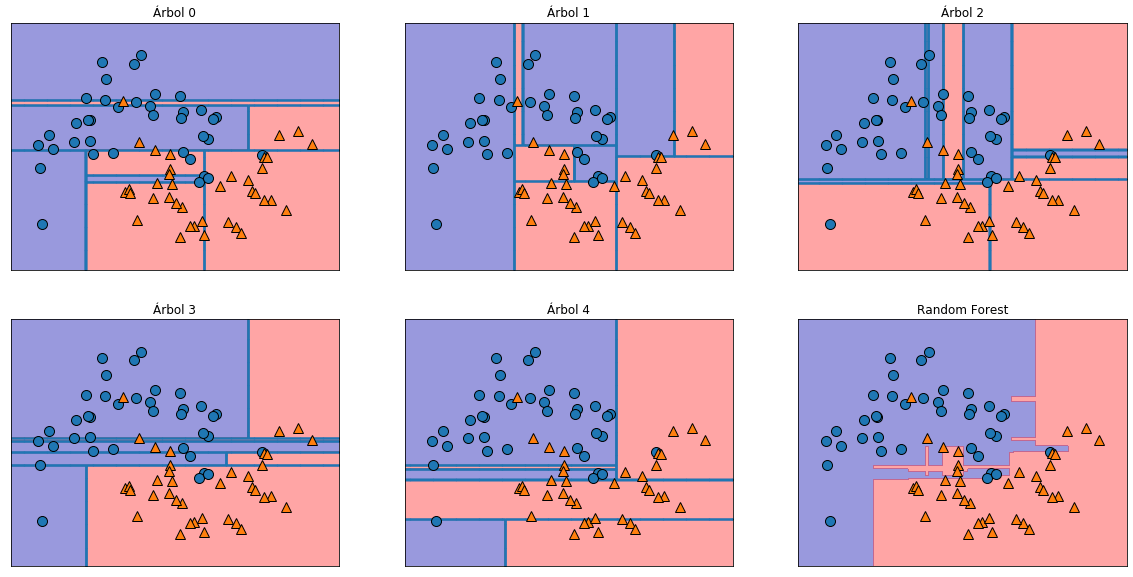

In [5]:
# Ahora lo pintamos
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# ravel(): devuelve un array aplanado de elementos contiguos
# Pasamos los árboles con el atributo _estimators_ a una 
# función visualizadora
for i, (ax, tree) in enumerate(zip(axes.ravel(),
                                   forest.estimators_)):
    ax.set_title("Árbol {}".format(i))
    mglearn.plots.plot_tree_partition(
        X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(
    forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(
    X_train[:, 0], X_train[:, 1], y_train)

# Vemso que las fronteras son diferentes y cómo se generan los árboles, en la vida real no se usan
# 4 árboles sino cientos de ellos

Puede verse con bastante claridad en los gráficos que la frontera de decisión aprendida por cada uno de los cinco árboles es bastante diferente. Cada uno de ellos comete errores ya que hay muestras de entrenamiento que no están incluidas en el dataset de entrenamiento del árbol en sí por efecto del bootstrapping.

El random forest sobreajusta menos que cualquiera de los árboles individuales, y por lo tanto suministra una frontera de decisión mucho más intuitiva. En un ejemplo real utilizaremos muchos más árboles (cientos o miles), lo cual producirán una frontera de decisión mucho más suave.

Pongamos un ejemplo más y construyamos una random forest de 100 árboles sobre el dataset de cancer de mama:

In [6]:
# Partimos nuestro cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


#from sklearn.datasets import load_breast_cancer
#cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# Instanciamos y entrenamos un bosque con 100 estimadores
forest = RandomForestClassifier(
    n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

# Muestra las precisiones de los dos sets de training y test
print("Precisión en el training set: {:.3f}"
      .format(forest.score(X_train, y_train)))
print("Precisión en el test set: {:.3f}"
      .format(forest.score(X_test, y_test)))

# La predicción del test es muy buena de partida, tanto de training como del test,
# entonces tendremos que tocar pocos parámetros
# Si comparamos con la Regresión lineal(0,95), este está mejor

Precisión en el training set: 1.000
Precisión en el test set: 0.972


El random forest nos da una precisión del 97%, mejor que la de los modelos lineales o la de un solo decision tree, sin tener que optimizar ningún parámetro. Podríamos ajustar el parámetro `max_features` o aplicar pre-prunning tal y como hicimos para el árbol de decisión único. Sin embargo, los valores por defecto parecer que funcionan bastante bien.

Al igual que el árbol de decisión, los random forests proporcionan importancia de características.  Éstas se calculan agregando las importancias de las características para todos los árboles del bosque. Lo habitual es que las importancias que suministra el random forest sean más fidedignas que las que suministra un único árbol.

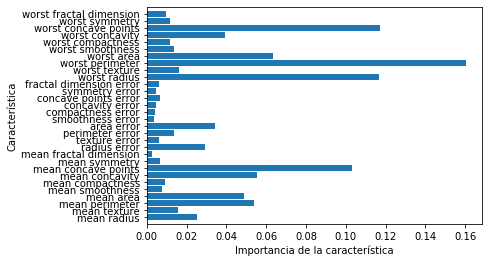

In [16]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), 
             model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Importancia de la característica")
    plt.ylabel("Característica")
    plt.ylim(-1, n_features)


plot_feature_importances_cancer(forest)

El random forest da una importancia distinta de cero a más caracteríscas que un único árbol, y al igual que éste, da mucha importancia a la característica *worst radius*. Sin embargo, elige *worst perimeter* como la característica más informativa de todas. La aleatoriedad introducida en la construcción del random forest obliga al algoritmo a considerar múltiples explicaciones, con el resultado de que el random forest tienen una perspectiva más amplia de los datos que un único árbol.

### Análisis de las Gradient Boosting Machines

Veamos un ejemplo de uso de `GradientBoostingClassifier` en el dataset de cáncer de mama. Por defecto, se usan 100 árboles de un máximo de tres niveles de profundidad y un learning rate de 0.1:

In [9]:
# Importamos GradientBoostingClassifier del mismo módulo ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Hacemos split train y test
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# Instanciamos y entrenamos el modelo
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

# Visualizamos las precisiones de ambos sets con 3 decimales
print("Precisión en el training set: {:.3f}"
      .format(gbrt.score(X_train, y_train)))
print("Precisión en el test set: {:.3f}"
      .format(gbrt.score(X_test, y_test)))
      
#Sale igual que el Random forest

Precisión en el training set: 1.000
Precisión en el test set: 0.965


La precisión en el training set indica que podemos estar sobreajustando. Para reducir este sobreajuste, podemos o bien aplicar un pre prunning más fuerte o bien bajar el parámetro learning rate:

In [11]:
# Reentrenamos aplicando prunning
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Precisión en el training set: {:.3f}"
      .format(gbrt.score(X_train, y_train)))
print("Precisión en el test set: {:.3f}"
      .format(gbrt.score(X_test, y_test)))

# Vemos que no hemos conseguido nada así, pero podría ser mejor para que el
# traning no sea tan preciso y se pueda generalizar más

Precisión en el training set: 0.991
Precisión en el test set: 0.972


In [12]:
# Reentrenamos modificando la tasa de aprendizaje
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Precisión en el training set: {:.3f}"
      .format(gbrt.score(X_train, y_train)))
print("PRecisión en el test set: {:.3f}"
      .format(gbrt.score(X_test, y_test)))

# Y también vemos que no hemos conseguido nada así

Precisión en el training set: 0.988
PRecisión en el test set: 0.965


Ambos métodos de decremento de la complejidad del modelo reducen la precisión en el training set, como era de esperar. En este caso, bajar la profundidad máxima del árbol mejora bastante el modelo, mientras que bajar el learning rate solo mejora la generalización levemente.

Como en los otros casos, vamos a ver cómo se están asignando las importancias de las características ahora:

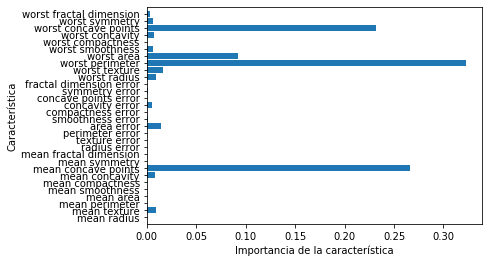

In [17]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Podemos ver que la importancia de las características es similar a la de los random forests, aunque aquí se ve que gradient boosting ignora completamente algunas de ellas.

Ya que tanto gradient boosting machines como random forests se comportan bien sobre tipos de datos parecidos, una aproximación tomada con frecuencia es probar primero un random forest, que es bastante robusto. Si el random forest funciona bien pero el tiempo que se tarda en hacer una predicción es crítico, o es importante exprimir al máximo la precisión en predicción del modelo, probar con gradient boosting suele ser de ayuda.

Si se quiere aplicar gradient boosting a problemas en gran escala, puede merecer la pena investigar algo más el paquete xgboost y su interfaz Python, que es más rápido que la implementación de Scikit-Learn para muchos datasets.